In [7]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier

### Load Iris Dataset

In [8]:
features, target = make_classification(n_samples=1000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)
feature_names = ["0", "1", "2", "3"]

print(features.shape)

(1000, 4)


In [9]:
comparison_acc = []
comparison_time = []

### PCA, kNN (k=1)

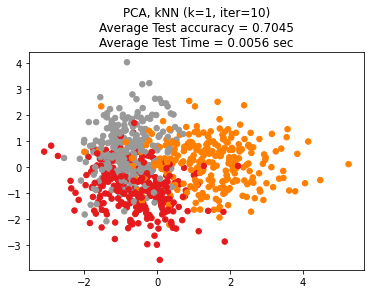

PC - kNN Average Accuracy : 0.704500
PC - kNN Classification Time : 0.0056 sec


In [10]:
# PCA, kNN
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True, stratify=target)

    k_neighbors = 1

    pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=seed))
    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    
    pca.fit(x_train, y_train)
    knn.fit(pca.transform(x_train), y_train)

    start = time.perf_counter()
    test_score = knn.score(pca.transform(x_test), y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

X_embedded = pca.transform(x_train)

plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, s=30, cmap="Set1")
plt.title("{}, kNN (k={}, iter={})\nAverage Test accuracy = {:.4f}\nAverage Test Time = {:.4f} sec".format("PCA", k_neighbors, max_seed, mean_acc, mean_time))
plt.show()

print("PC - kNN Average Accuracy : %f" % mean_acc)
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

### LDA, kNN (k=1)

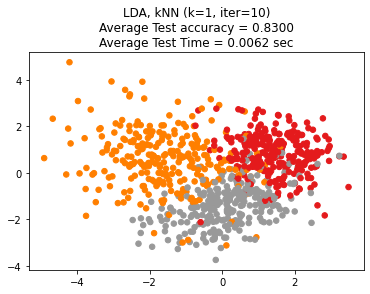

PC - kNN Average Accuracy : 0.830000
PC - kNN Classification Time : 0.0062 sec


In [11]:
# LDA, kNN
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True, stratify=target)

    k_neighbors = 1

    lda = make_pipeline(StandardScaler(), LDA(n_components=2))
    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    
    lda.fit(x_train, y_train)
    knn.fit(lda.transform(x_train), y_train)

    start = time.perf_counter()
    test_score = knn.score(lda.transform(x_test), y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

X_embedded = lda.transform(x_train)

plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, s=30, cmap="Set1")
plt.title("{}, kNN (k={}, iter={})\nAverage Test accuracy = {:.4f}\nAverage Test Time = {:.4f} sec".format("LDA", k_neighbors, max_seed, mean_acc, mean_time))
plt.show()

print("PC - kNN Average Accuracy : %f" % mean_acc)
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

### NCA, kNN (k=1)

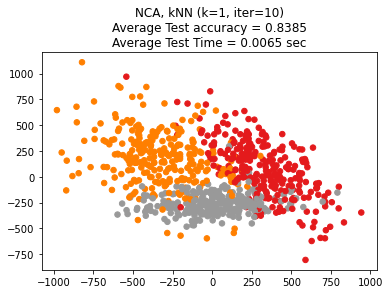

PC - kNN Average Accuracy : 0.838500
PC - kNN Classification Time : 0.0065 sec


In [12]:
# NCA, kNN
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True, stratify=target)

    k_neighbors = 1

    nca = make_pipeline(StandardScaler(), NCA(n_components=2, random_state=seed))
    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    
    nca.fit(x_train, y_train)
    knn.fit(nca.transform(x_train), y_train)

    start = time.perf_counter()
    test_score = knn.score(nca.transform(x_test), y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

X_embedded = nca.transform(x_train)

plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, s=30, cmap="Set1")
plt.title("{}, kNN (k={}, iter={})\nAverage Test accuracy = {:.4f}\nAverage Test Time = {:.4f} sec".format("NCA", k_neighbors, max_seed, mean_acc, mean_time))
plt.show()

print("PC - kNN Average Accuracy : %f" % mean_acc)
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

### Method Comparison

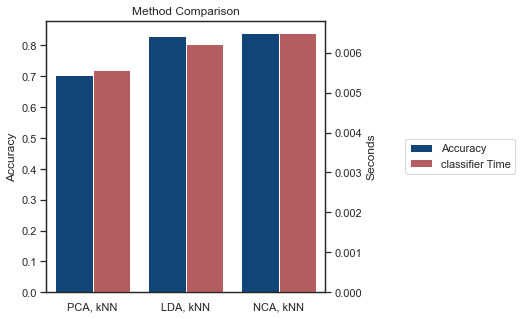

In [13]:
df_stack = pd.DataFrame(dict(
    score = [comparison_acc[0], comparison_acc[1], comparison_acc[2]],
    classifier = [comparison_time[0], comparison_time[1], comparison_time[2]]
))

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(5, 5))
ax2 = ax1.twinx()

sns.barplot(x=["PCA, kNN", "LDA, kNN", "NCA, kNN"],
            y="score",
            data=df_stack,
            label="Accuracy",
            color='#004488',
            ax=ax1)

sns.barplot(x=["PCA, kNN", "LDA, kNN", "NCA, kNN"], 
            y="classifier",
            data=df_stack,
            label="classifier Time",
            color='r',
            ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

width_scale = 0.5

for bar in ax1.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

for bar_containers in ax2.containers:
    for bar in bar_containers:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)

plt.legend(lines, labels, loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.title("Method Comparison")
plt.show()
sns.set()

<ipython-input-14-4ee863e9a731>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)
<ipython-input-14-4ee863e9a731>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)
<ipython-input-14-4ee863e9a731>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadri

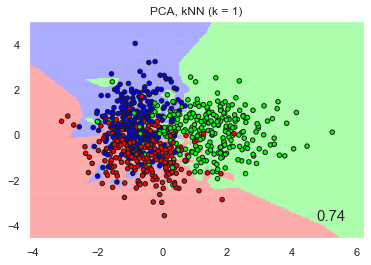

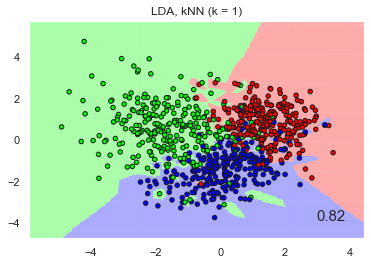

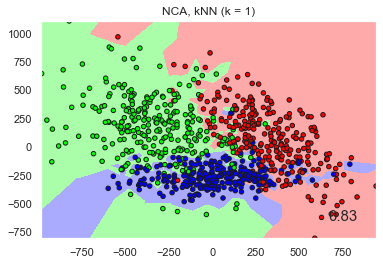

In [14]:
k_neighbors = 1
seed = 9
h = 0.05

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=seed))
lda = make_pipeline(StandardScaler(), LDA(n_components=2))
nca = make_pipeline(StandardScaler(), NCA(n_components=2, random_state=seed))

dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

for name, clf in dim_reduction_methods:
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True, stratify=target)
    
    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)

    clf.fit(x_train, y_train)
    knn.fit(clf.transform(x_train), y_train)
    score = knn.score(clf.transform(x_test), y_test)
    x_train = clf.transform(x_train)

    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{}, kNN (k = {})".format(name, k_neighbors))
    plt.text(0.9, 0.1, "{:.2f}".format(score), size=15, ha="center", va="center", transform=plt.gca().transAxes)

plt.show()

<ipython-input-15-92d6b7ef1bb3>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)
<ipython-input-15-92d6b7ef1bb3>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)
<ipython-input-15-92d6b7ef1bb3>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadri

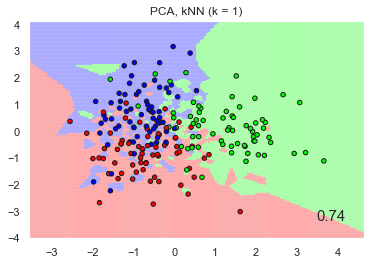

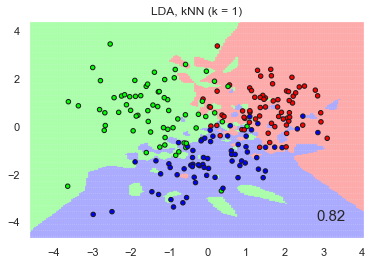

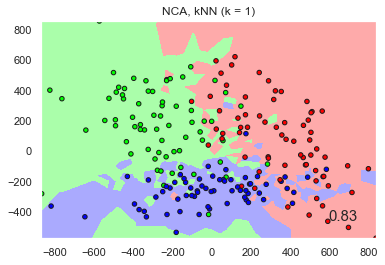

In [15]:
k_neighbors = 1
seed = 9
h = 0.05

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=seed))
lda = make_pipeline(StandardScaler(), LDA(n_components=2))
nca = make_pipeline(StandardScaler(), NCA(n_components=2, random_state=seed))

dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

for name, clf in dim_reduction_methods:
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True, stratify=target)
    
    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)

    clf.fit(x_train, y_train)
    knn.fit(clf.transform(x_train), y_train)
    score = knn.score(clf.transform(x_test), y_test)
    x_test = clf.transform(x_test)

    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{}, kNN (k = {})".format(name, k_neighbors))
    plt.text(0.9, 0.1, "{:.2f}".format(score), size=15, ha="center", va="center", transform=plt.gca().transAxes)

plt.show()